In [1]:
import os
import numpy as np
import pickle
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from itertools import combinations
import time
import pandas as pd
from data_generators import batches_generator


import lightgbm as lgb 
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings("ignore")


In [2]:
dataset_test = ['./test_buckets_rnn/processed_chunk_000.pkl']
dataset_test = ['../data/7Folds/test_buckets_rnn/processed_chunk_000.pkl']


In [3]:
#with open('data.pickle', 'rb') as f:
#    data_new = pickle.load(f)

i=7                                  

depo_path = '../data/depo/'
with open(os.path.join(depo_path,  "y_val_pred_parts_net2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_pred_parts_net, f)    
            y_val_pred_parts_net2 = pickle.load(f)        

with open(os.path.join(depo_path,  "y_test_preds_net2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_test_preds_net, f)    
            y_test_preds_net2 = pickle.load(f)            

with open(os.path.join(depo_path,  "y_val_true_parts_net2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_true_parts_net, f)   
            y_val_true_parts_net2 = pickle.load(f)            

with open(os.path.join(depo_path,  "cut_list_net2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(cut_list_net, f)    
            cut_list_net2 = pickle.load(f)    
    
    
    
    
    
    
with open(os.path.join(depo_path,  "y_val_pred_parts_net_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_pred_parts_net, f)    
            y_val_pred_parts_net = pickle.load(f)        

with open(os.path.join(depo_path,  "y_test_preds_net_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_test_preds_net, f)    
            y_test_preds_net = pickle.load(f)            

with open(os.path.join(depo_path,  "y_val_true_parts_net_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_true_parts_net, f)   
            y_val_true_parts_net = pickle.load(f)            

with open(os.path.join(depo_path,  "cut_list_net_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(cut_list_net, f)    
            cut_list_net = pickle.load(f)    
     
    
    
    
    
    
    

with open(os.path.join(depo_path,  "y_val_pred_parts_lgbm_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_pred_parts_net, f)    
            y_val_pred_parts_lgbm = pickle.load(f)        

with open(os.path.join(depo_path,  "y_test_preds_lgbm_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_test_preds_net, f)    
            y_test_preds_lgbm = pickle.load(f)            

with open(os.path.join(depo_path,  "y_val_true_parts_lgbm_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_true_parts_net, f)   
            y_val_true_parts_lgbm = pickle.load(f)            

with open(os.path.join(depo_path,  "cut_list_lgbm_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(cut_list_net, f)    
            cut_list_lgbm = pickle.load(f)    





            
with open(os.path.join(depo_path,  "y_val_pred_parts_lgbm2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_pred_parts_net, f)    
            y_val_pred_parts_lgbm2 = pickle.load(f)        

with open(os.path.join(depo_path,  "y_test_preds_lgbm2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_test_preds_net, f)    
            y_test_preds_lgbm2 = pickle.load(f)            

with open(os.path.join(depo_path,  "y_val_true_parts_lgbm2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(y_val_true_parts_net, f)   
            y_val_true_parts_lgbm2 = pickle.load(f)            

with open(os.path.join(depo_path,  "cut_list_lgbm2_Fold_"+str(i)+".h5"), "rb") as f:
            #pickle.dump(cut_list_net, f)    
            cut_list_lgbm2 = pickle.load(f)    
            

In [4]:
print()

In [5]:
def get_lgbm_result_level2(x, y, test_enc):
    global cls_model
    
    
    
    train_enc, train_y, val_enc, val_y = x[:400000], y[:400000], x[400000:], y[400000:]
    
    
    params = {
        "boosting_type": "gbdt", # gbdt goss
        "objective": "binary",
        "metric": "auc",
        "learning_rate": 0.001,  # 0.003,
        "n_jobs": 8,
        "seed": 15,
        "max_depth": 5,
        "verbose": -1,
    }

   
    
    
    dtrain = lgb.Dataset(
        data=train_enc, label=train_y, free_raw_data=False
    )
    dvalid = lgb.Dataset(
        data=val_enc,  label=val_y, free_raw_data=False
    )

  
    
    
    def lgboost_optimize_params(num_leaves, 
                                feature_fraction, 
                                bagging_fraction,
                                max_depth,
                               ):

        params["num_leaves"] = int(num_leaves)
        params["feature_fraction"] = feature_fraction
        params["bagging_fraction"] = bagging_fraction
        params["max_depth"] = int(max_depth)       
        
        
        

        model = lgb.train(
            params=params,
            train_set=dtrain,
            num_boost_round=50, #1500,
            valid_sets=[dtrain, dvalid],
            categorical_feature="auto",
            early_stopping_rounds=250,
            #verbose_eval=10,
            verbose_eval=False,
        )
       
        
        
        return roc_auc_score(val_y, model.predict(val_enc))

    


    
    params_search={
                    'num_leaves': (24, 45),
                    'feature_fraction': (0.1, 0.8),
                    'bagging_fraction': (0.8, 1),
                    'max_depth': (4, 13),
                   }
    
  
    
    
    
    lgb_params_search = BayesianOptimization(
        lgboost_optimize_params,
        pbounds=params_search,
        random_state=42
    )
    lgb_params_search.maximize(
        init_points=5, n_iter=5 #, acq='ei'
    )                                                    
                                                    
    optimal_lgb_params = lgb_params_search.max                                                

    print(optimal_lgb_params['params'])
    
    
    
    for key in optimal_lgb_params['params']:
        print(key, optimal_lgb_params['params'][key])
        params[key] = optimal_lgb_params['params'][key]
    print()
    
    params['max_depth'] = int((params['max_depth']).round())
    params['num_leaves'] = int((params['num_leaves']).round())
    print('================new params==================')
    print(params)    
    
   
    
    
    
    
    
    
    
    
    cls_model = lgb.train(
        params=params,
        train_set=dtrain,
        num_boost_round=7500,  #00,
        valid_sets=[dtrain, dvalid],
        categorical_feature="auto",
        early_stopping_rounds=300,
        verbose_eval=100,
        #verbose_eval=False,
    )

    #ypred_train = cls_model.predict(train_enc)
    ypred_valid = cls_model.predict(val_enc)
    ypred_test = cls_model.predict(test_enc)


    print('roc_auc_score:', roc_auc_score(val_y, ypred_valid))
    print('lgb pass ==========================================')
    print()
    
    return ypred_valid, ypred_test    

In [6]:
def get_summary(cut_list, y_val_pred_list, y_test_preds_list, y_val_true_list, dataset_test): #   
    
    #dataset_test = None
    y_val_pred_parts, y_test_preds, y_val_true_parts = y_val_pred_list.copy(), y_test_preds_list.copy(), y_val_true_list.copy()
    
    
    

    k_list=[]
    for i in range(len(cut_list)):
        k = 0.5/cut_list[i]
        k_list.append(k)

    print(k_list)



    for i in range(len(y_val_pred_parts)):
        y_val_pred_parts[i] = y_val_pred_parts[i]*k_list[i]

    for i in range(len(y_test_preds)):
        y_test_preds[i] = y_test_preds[i]*k_list[i]



    y_end  =y_test_preds[0]
    y      =y_val_true_parts[0].reshape(-1,1)
    y_vpred=y_val_pred_parts[0].reshape(-1,1)


    for i in range(1,len(y_val_true_parts)):
        y_val_true_parts[i]=y_val_true_parts[i].reshape(-1,1)
        y_val_pred_parts[i]=y_val_pred_parts[i].reshape(-1,1)  
        y=np.vstack((y,y_val_true_parts[i]))
        y_vpred=np.vstack((y_vpred,y_val_pred_parts[i]))  


        
    for i in range(1,len(y_test_preds)):
        y_end         = y_end*y_test_preds[i]
    y_end      = y_end**(1/len(y_test_preds))


    if dataset_test is None:
        test_preds = None
        pass
    else:

        test_generator = batches_generator(dataset_test, batch_size=128, shuffle=False,
                                           is_train=False, output_format="tf")


        ids=[]
        for _, batch_ids in test_generator:
            ids.extend(batch_ids)

        test_preds = pd.DataFrame({"id": ids, "score": y_end})
    
    print('Final ROC AUC:    ', roc_auc_score(y, y_vpred))
    
    return y, y_vpred, test_preds

In [7]:
def get_dics_results(models_dic):
    models_list = list(models_dic.keys())
    result_dic ={}
    for n in [4,3,2]:
        for i in combinations(models_list, n):
            result_1 = 1
            result_2 = 0
            name1 = 'mul_'
            name2 = 'sum_'        
            for j in i:
                result_1 = result_1 * models_dic[j]
                result_2 = result_2 + models_dic[j]            
                name1 = name1 + j +'_'
                name2 = name2 + j +'_'    
                
            result_1 = (result_1)**(1/len(i))   
            result_2 = result_2 / len(i)  
            #print(i) # ab ac ad bc bd cd       
            #print(name1, ':', result_1)
            #print(name2, ':', result_2)
            result_dic[name1] = result_1
            result_dic[name2] = result_2


            #print('=====================================')
    z = result_dic.update(models_dic)
    return result_dic


def get_scores(y_valid, result_dic):
    scores_dic ={}
    best = 0.
    for i in result_dic:        
        scor  = roc_auc_score(y_valid, result_dic[i])
        scores_dic[i] = scor
        if scor > best:
            best = scor
            name = i   
        #print(i, result_dic[i])
    #print()    
    #print(name, best)
    return name, scores_dic

In [8]:


y_val_true_parts_final  =[] 
y_val_pred_parts_final  =[] 
y_test_preds_final      =[] 
scors_list_final        =[]
cut_list_final          =[]





m=7
for i in range(m):
    
    start = time.time()
 
    
    y_val_lstm_st1 = y_val_pred_parts_lgbm[i]
    y_val_lstm_st2 = y_val_pred_parts_lgbm2[i]
    y_val_net_st1 = y_val_pred_parts_net[i]
    y_val_net_st2 = y_val_pred_parts_net2[i]
    
    val_y = y_val_true_parts_net2[i]
    
 

    y_test_lstm_st1 = y_test_preds_lgbm[i]
    y_test_lstm_st2 = y_test_preds_lgbm2[i]
    y_test_net_st1 = y_test_preds_net[i]
    y_test_net_st2 = y_test_preds_net2[i]



    """
    a = y_val_lstm_st1.reshape(-1,1)
    b = y_val_lstm_st2.reshape(-1,1)
    c = y_val_net_st1.reshape(-1,1)
    d = y_val_net_st2.reshape(-1,1)
    
    y_val_level2 = np.hstack((a,b,c,d))

    
    a = y_test_lstm_st1.reshape(-1,1)
    b = y_test_lstm_st2.reshape(-1,1)
    c = y_test_net_st1.reshape(-1,1)
    d = y_test_net_st1.reshape(-1,1)
    
    y_test_level2 = np.hstack((a,b,c,d))
    
    """



    

    models_dic = {'lstm_st1':y_val_lstm_st1, 'lstm_st2':y_val_lstm_st2, 'net_st1':y_val_net_st1, 'net_st2':y_val_net_st2,}
    valid_data_dic = get_dics_results(models_dic)
    
    name, scores_dic = get_scores(val_y, valid_data_dic)
    
    
    print(name,  scores_dic[name])    
    print(scores_dic)    
    print()
    
    models_dic = {'lstm_st1':y_test_lstm_st1, 'lstm_st2':y_test_lstm_st2, 'net_st1':y_test_net_st1, 'net_st2':y_test_net_st2,}
    test_data_dic = get_dics_results(models_dic)


      

    
    fpr, tpr, thresholds = metrics.roc_curve(val_y, valid_data_dic[name], pos_label=1)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    optimal_threshold

    
    
    
    
    cut_list_final.append(optimal_threshold)     
    y_val_true_parts_final.append(val_y)
    y_val_pred_parts_final.append(valid_data_dic[name])
    y_test_preds_final.append(test_data_dic[name])         
            
    scors_list_final.append(scores_dic[name])        
            
            
            

            
    #ypred_valid_lgbm_level2, ypred_test_lgbm_level2 = get_lgbm_result_level2(y_val_level2,  val_y, y_test_level2)            
            
            
            
            
            



    end = time.time()
    duration = end - start    

    print('Fold:', i , 'pass. Time', duration,  'sec.')    
    print('=======================================================================================================')
    print()
    print()    


mul_lstm_st1_lstm_st2_ 0.7877827284819685
{'mul_lstm_st1_lstm_st2_net_st1_net_st2_': 0.7874302453893292, 'sum_lstm_st1_lstm_st2_net_st1_net_st2_': 0.7875082834300686, 'mul_lstm_st1_lstm_st2_net_st1_': 0.7874371927700773, 'sum_lstm_st1_lstm_st2_net_st1_': 0.7874769743875492, 'mul_lstm_st1_lstm_st2_net_st2_': 0.7873013550018668, 'sum_lstm_st1_lstm_st2_net_st2_': 0.7873748206481088, 'mul_lstm_st1_net_st1_net_st2_': 0.7867662941438007, 'sum_lstm_st1_net_st1_net_st2_': 0.7868088785925528, 'mul_lstm_st2_net_st1_net_st2_': 0.7867094219983816, 'sum_lstm_st2_net_st1_net_st2_': 0.7868156756536798, 'mul_lstm_st1_lstm_st2_': 0.7877827284819685, 'sum_lstm_st1_lstm_st2_': 0.7877819156720556, 'mul_lstm_st1_net_st1_': 0.7855003380019571, 'sum_lstm_st1_net_st1_': 0.785461193529263, 'mul_lstm_st1_net_st2_': 0.7867670624795098, 'sum_lstm_st1_net_st2_': 0.7868370718903069, 'mul_lstm_st2_net_st1_': 0.7867505185538747, 'sum_lstm_st2_net_st1_': 0.7868033685734412, 'mul_lstm_st2_net_st2_': 0.7854435226049844,

Fold: 5 pass. Time 2.875286817550659 sec.


sum_lstm_st1_lstm_st2_ 0.7876858983590864
{'mul_lstm_st1_lstm_st2_net_st1_net_st2_': 0.787194725315111, 'sum_lstm_st1_lstm_st2_net_st1_net_st2_': 0.7869634805876318, 'mul_lstm_st1_lstm_st2_net_st1_': 0.7874938106015603, 'sum_lstm_st1_lstm_st2_net_st1_': 0.787351159410404, 'mul_lstm_st1_lstm_st2_net_st2_': 0.7868930866605635, 'sum_lstm_st1_lstm_st2_net_st2_': 0.7865726509076771, 'mul_lstm_st1_net_st1_net_st2_': 0.7865650229162453, 'sum_lstm_st1_net_st1_net_st2_': 0.7863366692955975, 'mul_lstm_st2_net_st1_net_st2_': 0.7859829957802116, 'sum_lstm_st2_net_st1_net_st2_': 0.7857870234735854, 'mul_lstm_st1_lstm_st2_': 0.787673351721085, 'sum_lstm_st1_lstm_st2_': 0.7876858983590864, 'mul_lstm_st1_net_st1_': 0.7856019141734218, 'sum_lstm_st1_net_st1_': 0.7854738830355242, 'mul_lstm_st1_net_st2_': 0.7865208495374103, 'sum_lstm_st1_net_st2_': 0.7860620532199046, 'mul_lstm_st2_net_st1_': 0.7867518022434837, 'sum_lstm_st2_net_st1_': 0.7866087437093591, 'm

In [9]:
scors_list_final

[0.7877827284819685,
 0.7910344630133903,
 0.7862696927703807,
 0.7869022596627303,
 0.7881991565550972,
 0.7888249825783511,
 0.7876858983590864]

In [10]:
del scors_list_final[2]
del y_val_pred_parts_final[2]
del y_test_preds_final[2]
del y_val_true_parts_final[2]

In [11]:
y, y_vpred, test_preds = get_summary(scors_list_final, y_val_pred_parts_final, y_test_preds_final, y_val_true_parts_final, dataset_test)


[0.6346927673363487, 0.6320837123774419, 0.6354029282039451, 0.6343574410626113, 0.633854164159078, 0.6347707900339513]
Final ROC AUC:     0.7883729582904153


In [12]:
scors_list_final

[0.7877827284819685,
 0.7910344630133903,
 0.7869022596627303,
 0.7881991565550972,
 0.7888249825783511,
 0.7876858983590864]

In [13]:
#test_preds.to_csv('./test_preds_5cut.csv', index=False)
test_preds

,id,score
0,3000014,0.013921
1,3000020,0.103242
2,3000027,0.022918
3,3000043,0.054062
4,3000049,0.015000
...,...,...
499995,3286660,0.012019
499996,3345810,0.016873
499997,3434512,0.020850
499998,3000786,0.013165


In [14]:
len(y_val_true_parts_final)

6

In [23]:
del scors_list_final[-1]
del y_val_pred_parts_final[-1]
del y_test_preds_final[-1]
del y_val_true_parts_final[-1]

In [24]:
scors_list_final

[0.7877827284819685,
 0.7910344630133903,
 0.7869022596627303,
 0.7881991565550972,
 0.7888249825783511]

In [25]:
y, y_vpred, test_preds = get_summary(scors_list_final, y_val_pred_parts_final, y_test_preds_final, y_val_true_parts_final, dataset_test)


[0.6346927673363487, 0.6320837123774419, 0.6354029282039451, 0.6343574410626113, 0.633854164159078]
Final ROC AUC:     0.7885150386667665


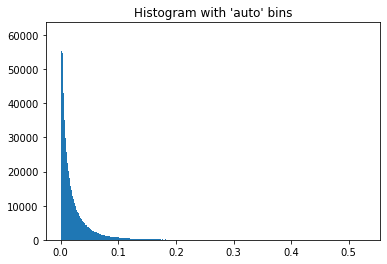

In [15]:
import matplotlib.pyplot as plt


_ = plt.hist(y_vpred, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

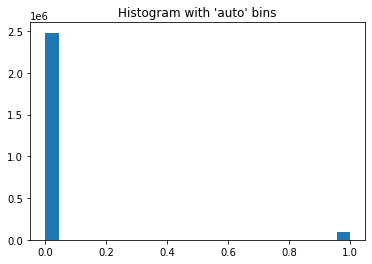

In [16]:
_ = plt.hist(y, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

In [17]:
y_vpred.min(), y_vpred.max()

(0.00019038223224329828, 0.5284241306739998)